In [1]:
import numpy as np
import pandas as pd
import os
import warnings

In [2]:
from keras.models import load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, BatchNormalization, Dropout
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [12,8]
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=15.5)    # legend fontsize
plt.rc('figure', titlesize=50)  # fontsize of the figure title

# NCF Grid Search Analysis

In [4]:
model_info_all_df = pd.read_csv('models/model_info_all.csv')

In [5]:
model_info_all_df.sort_values('test mse')

,Unnamed: 0,model,test mse,test preds std,epochs,learning rate,n_nodes_per_layer,n_factors,batch_size,dropout_prob,patience,early stopping metric
22,22,22,0.877472,5.548574e-01,250,0.0010,"[512, 256, 128, 64, 32, 16, 8, 4, 2]",5,256,0.2,5,val_loss
5,5,5,0.886648,7.023544e-01,250,0.0100,"[1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]",25,256,0.2,5,val_loss
41,41,41,0.888470,5.652527e-01,250,0.0100,"[256, 128, 64, 32, 16, 8, 4, 2]",5,256,0.2,5,val_loss
49,49,49,0.891468,5.828209e-01,250,0.0100,"[256, 128, 64, 32, 16, 8, 4, 2]",50,256,0.2,5,val_loss
11,11,11,0.902415,6.159833e-01,250,0.0001,"[1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]",50,256,0.2,5,val_loss
48,48,48,0.905209,6.811764e-01,250,0.1000,"[256, 128, 64, 32, 16, 8, 4, 2]",50,256,0.2,5,val_loss
6,6,6,0.911475,6.475879e-01,250,0.0010,"[1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]",25,256,0.2,5,val_loss
29,29,29,0.916098,6.232197e-01,250,0.0100,"[512, 256, 128, 64, 32, 16, 8, 4, 2]",50,256,0.2,5,val_loss
7,7,7,0.916653,5.753726e-01,250,0.0001,"[1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]",25,256,0.2,5,val_loss
57,57,57,0.917084,7.627777e-01,250,0.0100,"[256, 128, 64, 32, 16, 8, 4, 2]",200,256,0.2,5,val_loss


The model with the lowest test MSE is Model 22.

# TFIDF Grid Search Analysis

In [9]:
final_result_full_tfidf_df = pd.read_csv('../final_result_full_tfidf.csv')

In [27]:
final_result_full_tfidf_df

,dataset_name,sim_method,algo,sim_threshold,neighbors,sig_weight,weighting_factor,coverage,mse,rmse,mae
0,ml-100k,TFIDF,new_get_TFIDF_recommendations,0.000000,0,0,0,0.99743,1.048402,1.023915,0.816841
1,ml-100k,TFIDF,new_get_TFIDF_recommendations,0.306194,0,0,0,0.99715,1.054174,1.026730,0.818359
2,ml-100k,TFIDF,new_get_TFIDF_recommendations,0.576448,0,0,0,0.98334,1.104257,1.050836,0.829047
3,ml-100k,TFIDF,new_get_TFIDF_recommendations,0.846703,0,0,0,0.83227,1.267398,1.125788,0.863466


In [10]:
final_result_full_tfidf_df.sort_values('mse')

,dataset_name,sim_method,algo,sim_threshold,neighbors,sig_weight,weighting_factor,coverage,mse,rmse,mae
0,ml-100k,TFIDF,new_get_TFIDF_recommendations,0.000000,0,0,0,0.99743,1.048402,1.023915,0.816841
1,ml-100k,TFIDF,new_get_TFIDF_recommendations,0.306194,0,0,0,0.99715,1.054174,1.026730,0.818359
2,ml-100k,TFIDF,new_get_TFIDF_recommendations,0.576448,0,0,0,0.98334,1.104257,1.050836,0.829047
3,ml-100k,TFIDF,new_get_TFIDF_recommendations,0.846703,0,0,0,0.83227,1.267398,1.125788,0.863466


The TFIDF model with the lowest MSE/best coverage has a sim_threshold of 0. 

# Hybrid Grid Search Analysis

In [11]:
final_result_full_hybrid_df = pd.read_csv('../final_result_full_hybrid.csv')

In [12]:
final_result_full_hybrid_df.sort_values('mse')

,dataset_name,sim_method,algo,sim_threshold,neighbors,sig_weight,weighting_factor,coverage,mse,rmse,mae
7,ml-100k,<function sim_pearson at 0x7fdf515cf790>,new_get_hybrid_recommendations,0.000000,100,100,1.00,0.99955,1.001539,1.000769,0.797949
5,ml-100k,<function sim_pearson at 0x7fdf515cf790>,new_get_hybrid_recommendations,0.000000,100,100,0.75,0.99955,1.009658,1.004818,0.801366
3,ml-100k,<function sim_pearson at 0x7fdf515cf790>,new_get_hybrid_recommendations,0.000000,100,100,0.50,0.99955,1.019228,1.009568,0.805351
6,ml-100k,<function sim_distance at 0x7fdf515cf700>,new_get_hybrid_recommendations,0.000000,100,100,1.00,0.99930,1.029657,1.014720,0.809199
1,ml-100k,<function sim_pearson at 0x7fdf515cf790>,new_get_hybrid_recommendations,0.000000,100,100,0.25,0.99955,1.031056,1.015409,0.810160
4,ml-100k,<function sim_distance at 0x7fdf515cf700>,new_get_hybrid_recommendations,0.000000,100,100,0.75,0.99930,1.033208,1.016469,0.810670
2,ml-100k,<function sim_distance at 0x7fdf515cf700>,new_get_hybrid_recommendations,0.000000,100,100,0.50,0.99930,1.037195,1.018428,0.812297
15,ml-100k,<function sim_pearson at 0x7fdf515cf790>,new_get_hybrid_recommendations,0.306194,100,100,1.00,0.99756,1.038395,1.019017,0.811929
0,ml-100k,<function sim_distance at 0x7fdf515cf700>,new_get_hybrid_recommendations,0.000000,100,100,0.25,0.99930,1.041837,1.020704,0.814153
13,ml-100k,<function sim_pearson at 0x7fdf515cf790>,new_get_hybrid_recommendations,0.306194,100,100,0.75,0.99724,1.052063,1.025701,0.817443


The Hybrid-Pearson model with the lowest mse has a sim_threshold of 0, 100 neighbors, a similarity significance weighting cutoff of 100, and a weighting factor of 1. 

# Model Comparison

In [56]:
best_user_distance_mse = 0.761348 # From midterm analysis.ipynb file, with threshold of 0.1, sig_weight of 25
best_user_pearson_mse = 0.769243 # From midterm analysis.ipynb file, with threshold of 0.3, sig_weight of 25
best_item_distance_mse = 0.652500 # From midterm analysis.ipynb file, with threshold of 0.0, sig_weight of 100
best_item_pearson_mse = 0.659491 # From midterm analysis.ipynb file, with threshold of 0.0, sig_weight of 100
best_mf_sgd_mse = 0.91 # from MF homework PDF
best_mf_als_mse = 0.99 # from MF homework PDF
best_tfidf_mse = float(final_result_full_tfidf_df.iloc[[0]]['mse'])
best_hybrid_pearson_mse = float(final_result_full_hybrid_df.iloc[[7]]['mse'])
best_hybrid_distance_mse = float(final_result_full_hybrid_df.iloc[[6]]['mse'])
best_ncf_mse = float(model_info_all_df[model_info_all_df['model'] == 22]['test mse'])

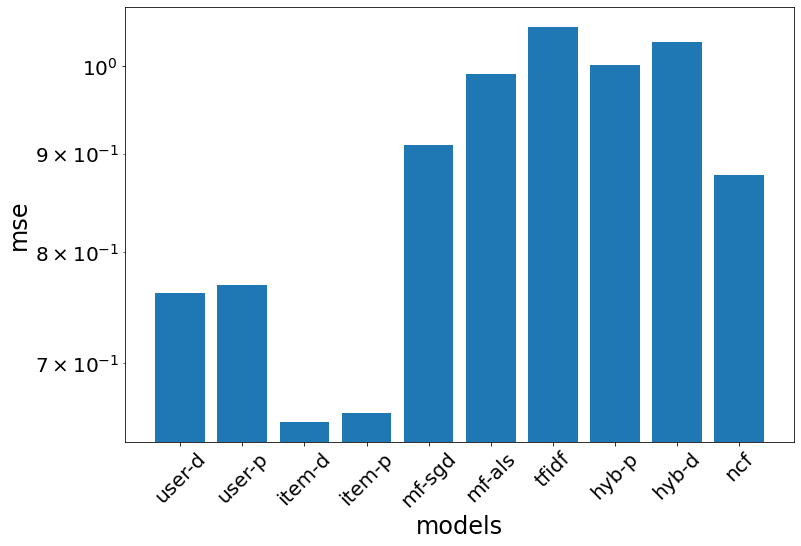

In [59]:
height_list = [best_user_distance_mse,
               best_user_pearson_mse,
               best_item_distance_mse,
               best_item_pearson_mse,
               best_mf_sgd_mse, 
               best_mf_als_mse, 
               best_tfidf_mse, 
               best_hybrid_pearson_mse, 
               best_hybrid_distance_mse, 
               best_ncf_mse]

model_labels_list = ['user-d', 'user-p', 'item-d', 'item-p', 'mf-sgd', 'mf-als', 'tfidf', 'hyb-p', 'hyb-d', 'ncf']
plt.bar(x = model_labels_list, height = height_list)
plt.yscale('log')
plt.xlabel('models')
plt.ylabel('mse')
plt.xticks(rotation = 45)
plt.savefig('../figures/model_comparison_bar.png')
